In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
x=dataset.iloc[:,[3,4]]

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserW

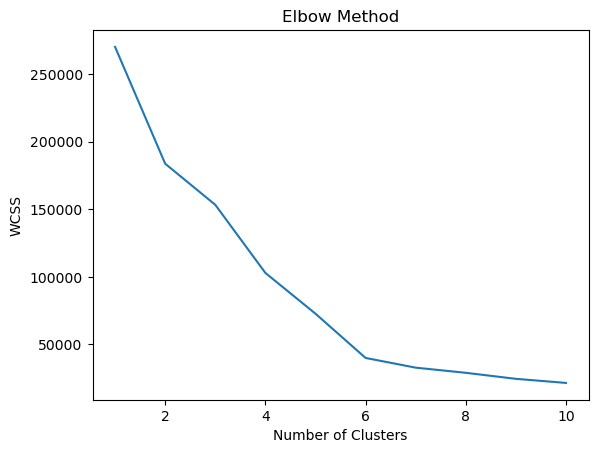

In [3]:
from sklearn.cluster import BisectingKMeans
inerlis=[]
for i in range(1,11):
    BK=BisectingKMeans(n_clusters=i,init='k-means++',random_state=42)
    BK=BK.fit(x)
    inerlis.append(BK.inertia_)
plt.plot(range(1,11),inerlis)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()         

In [6]:
from sklearn.cluster import BisectingKMeans
BK=BisectingKMeans(n_clusters=6,init="k-means++",random_state=42)
clusout=BK.fit_predict(x)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
unsupervised=dataset
unsupervised['cluster_group']=clusout
unsupervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,5
197,198,Male,32,126,74,4
198,199,Male,32,137,18,5


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


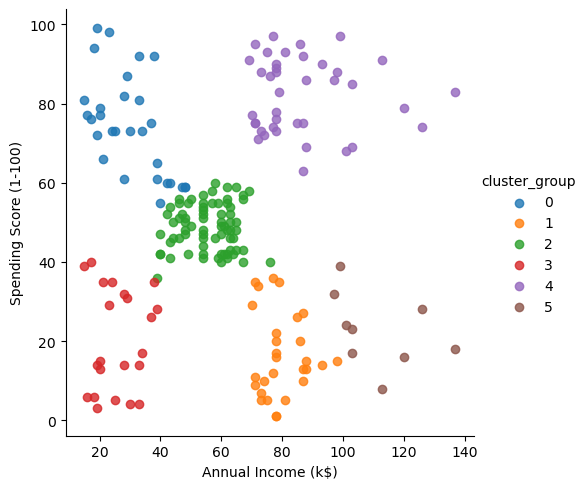

In [10]:
import seaborn as sb
sb.lmplot(data=unsupervised,x=unsupervised.columns[3],y=unsupervised.columns[4],hue=unsupervised.columns[5],fit_reg=False,legend=True,legend_out=True)

In [14]:
from sklearn.metrics import silhouette_score
ss=silhouette_score(x,clusout)
ss


0.5046770499202112